# Data Visualization Examples for Cancer Risk Analysis

This notebook demonstrates how to visualize cancer incidence data from USCS (U.S. Cancer Statistics).

## Overview

We'll create several visualizations:
1. Pediatric brain tumor incidence patterns
2. Age-specific cancer incidence across lifespan
3. Multi-year comparison of incidence trends


In [3]:
# Import libraries
import sys
from pathlib import Path
import importlib

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Import project modules
from src.data_loader import (
    load_uscs_data,
    prepare_pediatric_brain_data,
    prepare_all_sites_age_data
)

# Force reload visualization modules if updated
if 'src.visualization' in sys.modules:
    importlib.reload(sys.modules['src.visualization'])

from src.utils import age_group_to_mid
from src.visualization import (
    plot_pediatric_brain_distribution,
    plot_pediatric_brain_by_year,
    plot_pediatric_brain_trend,
    plot_age_incidence_curve,
    plot_multi_year_comparison
)

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 11

print("✓ All modules imported successfully!")


✓ All modules imported successfully!


## Data Sources: USCS (current) and TCGA (planned)

These visualizations are currently based on **USCS (U.S. Cancer Statistics)** incidence tables stored in `data/USCS-1999-2022-ASCII/`.

TCGA (The Cancer Genome Atlas) data under `data/TCGA/` is planned for future visualization modules, for example to compare population-level incidence (USCS) with tumor-level genomic features (TCGA) across tissues and ages.


In [4]:
## 1. Load and Prepare Data


In [5]:
# Load data
print("Loading USCS data...")
brain_by_site, by_age = load_uscs_data()

print(f"✓ BRAINBYSITE shape: {brain_by_site.shape}")
print(f"✓ BYAGE shape: {by_age.shape}")

# Prepare data
pediatric_brain = prepare_pediatric_brain_data(brain_by_site)
all_sites_age_inc = prepare_all_sites_age_data(by_age)

print(f"\n✓ Pediatric brain tumor records: {pediatric_brain.shape[0]}")
print(f"✓ Age-specific incidence records: {all_sites_age_inc.shape[0]}")


Loading USCS data...
✓ BRAINBYSITE shape: (8400, 10)
✓ BYAGE shape: (448628, 11)

✓ Pediatric brain tumor records: 1041
✓ Age-specific incidence records: 1350


In [6]:
## 2. Pediatric Brain Tumor Incidence Patterns
# Visualize pediatric brain tumor incidence data across different sites and years.


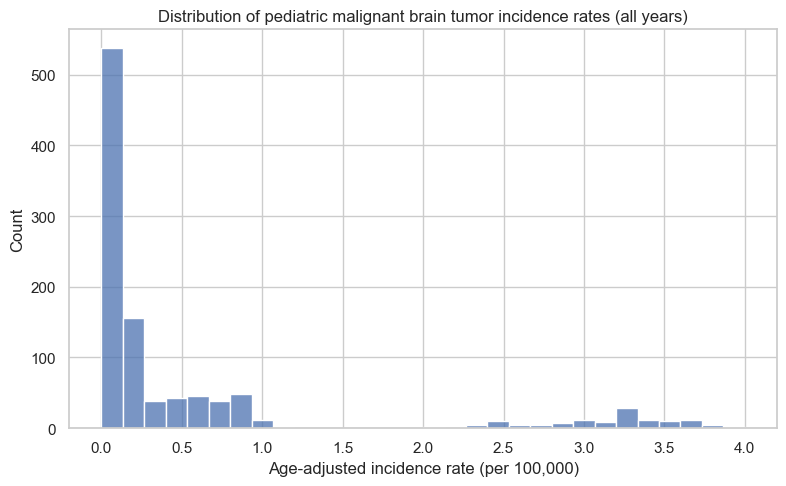

In [7]:
# Figure 1: Distribution of incidence rates
plt.figure(figsize=(8, 5))
plot_pediatric_brain_distribution(pediatric_brain)


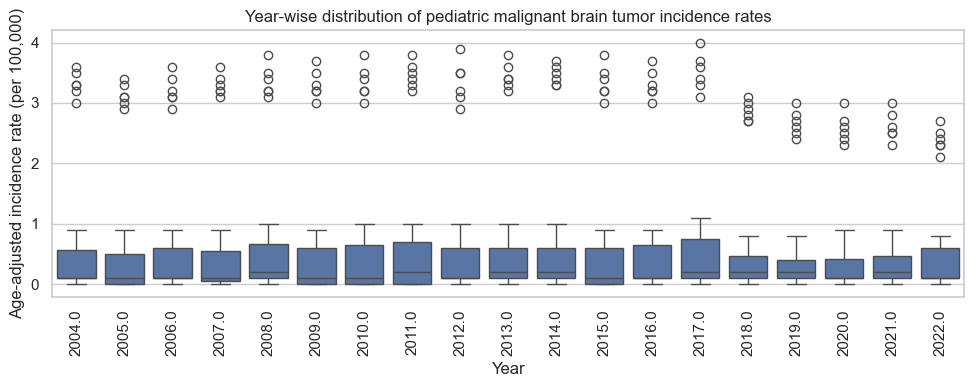

In [8]:
# Figure 2: Year-wise distribution (boxplot)
plot_pediatric_brain_by_year(pediatric_brain)


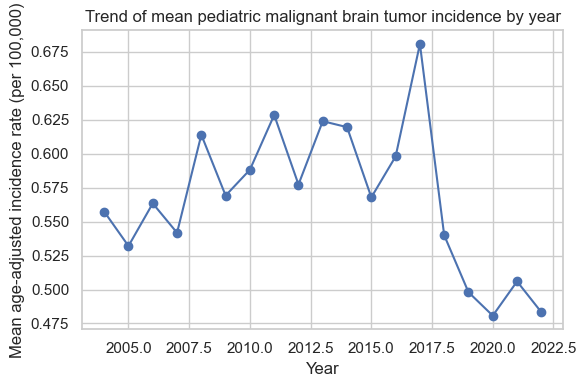

In [9]:
# Figure 3: Trend over time
plot_pediatric_brain_trend(pediatric_brain)


## 3. Age-Specific Cancer Incidence Across Lifespan

Visualize how cancer incidence changes with age for all cancer sites combined.


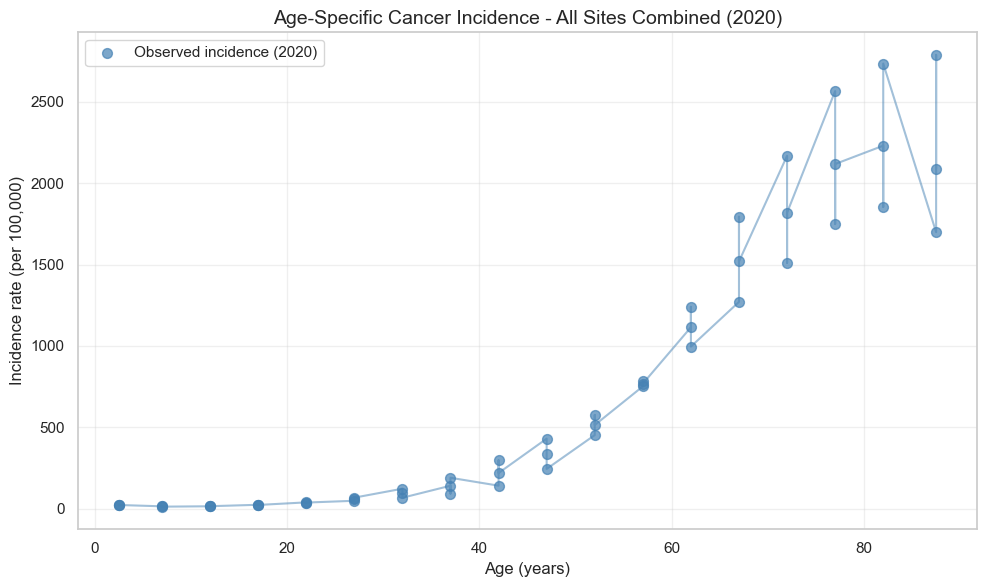

✓ Data points: 54 age groups
✓ Age range: 2.5 - 87.5 years
✓ Incidence range: 11.4 - 2788.5 per 100,000


In [10]:
# Prepare age-incidence data for 2020
TARGET_YEAR = 2020

# Filter for target year
age_model_df = all_sites_age_inc.copy()
age_model_df["AGE_MID"] = age_model_df["AGE"].apply(age_group_to_mid)
age_model_df = age_model_df[age_model_df["AGE_MID"].notna()].copy()

age_year_df = age_model_df[
    pd.to_numeric(age_model_df["YEAR"], errors="coerce") == TARGET_YEAR
].copy()
age_year_df = age_year_df.sort_values("AGE_MID")

# Get ages and rates
ages = age_year_df["AGE_MID"].values
rates = age_year_df["RATE"].values

# Create visualization using the helper function
plot_age_incidence_curve(ages, rates, target_year=TARGET_YEAR)

print(f"✓ Data points: {len(ages)} age groups")
print(f"✓ Age range: {ages.min():.1f} - {ages.max():.1f} years")
print(f"✓ Incidence range: {rates.min():.1f} - {rates.max():.1f} per 100,000")


## 4. Multi-Year Comparison

Compare age-incidence curves across different years to observe temporal trends.
